In [553]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm #
import matplotlib.colors as mcolors #
import seaborn as sns
import math
from datetime import timedelta
%matplotlib inline

In [554]:
calendar = pd.read_csv('Formula1_Calendar.csv')
calendar.set_index('Round', inplace=True)
drivers = pd.read_csv('Formula1_Drivers.csv')
drivers.set_index('Abbreviation', inplace=True)
raceResults = pd.read_csv('Formula1_RaceResults.csv')
sprintResults = pd.read_csv('Formula1_SprintResults.csv')

In [555]:
calendar[['GP Name', 'Country', 'City', 'Circuit Name', 'Race Date', 'Circuit Length(km)', 'Number of Laps']]

,GP Name,Country,City,Circuit Name,Race Date,Circuit Length(km),Number of Laps
Round,,,,,,,
1,Louis Vuitton Australian Grand Prix,Australia,Melbourne,Albert Park Circuit,16-03-2025,5.278,58
2,Heineken Chinese Grand Prix,China,Shanghai,Shanghai International Circuit,23-03-2025,5.451,56
3,Lenovo Japanese Grand Prix,Japan,Suzuka,Suzuka Circuit,06-04-2025,5.807,53
4,Gulf Air Bahrain Grand Prix,Bahrain,Sakhir,Bahrain International Circuit,13-04-2025,5.412,57
5,STC Saudi Arabian Grand Prix,Saudi Arabia,Jeddah,Jeddah Corniche Circuit,20-04-2025,6.174,50
6,Crypto.com Miami Grand Prix,United States,Miami,Miami International Autodrome,04-05-2025,5.412,57
7,AWS Gran Premio Del Made in Italy e Dell'Emili...,Italy,Imola,Autodromo Internazionale Enzo e Dino Ferrari,18-05-2025,4.909,63
8,Tag Heuer Grand Prix de Monaco,Monaco,Monaco,Circuit de Monaco,25-05-2025,3.337,78
9,Aramco Gran Premio de España,Spain,Barcelona,Circuit de Barcelona-Catalunya,01-06-2025,4.657,66


In [556]:
calendar[['GP Name', 'Record Year', 'Lap Record', 'Record Owner']]

,GP Name,Record Year,Lap Record,Record Owner
Round,,,,
1,Louis Vuitton Australian Grand Prix,2024,01:19.8,Charles Leclerc
2,Heineken Chinese Grand Prix,2004,01:32.2,Michael Schumacter
3,Lenovo Japanese Grand Prix,2025,01:31.0,Kimi Antonelli
4,Gulf Air Bahrain Grand Prix,2005,01:31.4,Pedro de la Rosa
5,STC Saudi Arabian Grand Prix,2021,01:30.7,Lewis Hamilton
6,Crypto.com Miami Grand Prix,2023,01:29.7,Max Verstappen
7,AWS Gran Premio Del Made in Italy e Dell'Emili...,2020,01:15.5,Lewis Hamilton
8,Tag Heuer Grand Prix de Monaco,2021,01:12.9,Lewis Hamilton
9,Aramco Gran Premio de España,2025,01:15.7,Oscar Piastri


In [557]:
drivers[[ 'Driver', 'Race Number', 'Team', 'Country','Grand Prix Entered', 'Highest Race Finish',
          'Date of Birth', 'Place of Birth']]

,Driver,Race Number,Team,Country,Grand Prix Entered,Highest Race Finish,Date of Birth,Place of Birth
Abbreviation,,,,,,,,
NOR,Lando Norris,4,McLaren,United Kingdom,152,1(x11),13-11-1999,"Bristol, England"
PIA,Oscar Piastri,81,McLaren,Australia,70,1(x9),06-04-2001,"Melbourne, Victoria"
RUS,George Russell,63,Mercedes,United Kingdom,152,1(x5),15-02-1998,"King's Lynn, England"
ANT,Kimi Antonelli,12,Mercedes,Italy,24,2(x1),25-08-2006,"Bologna, Italy"
VER,Max Verstappen,1,Red Bull Racing,Netherlands,233,1(x71),30-09-1997,"Hasselt, Belgium"
TSU,Yuki Tsunoda,22,Red Bull Racing,Japan,111,4(x1),11-05-2000,"Sagamihara, Japan"
LEC,Charles Leclerc,16,Ferrari,Monaco,171,1(x8),16-10-1997,"Monte Carlo, Monaco"
HAM,Lewis Hamilton,44,Ferrari,United Kingdom,380,1(x105),07-01-1985,"Stevenage, England"
ALB,Alexander Albon,23,Williams,Thailand,128,3(x2),23-03-1996,"London, England"


In [558]:
def assign_color(val_type,values):
    cl = []
    for val in values:
        if val_type == 'drivers':  abbr = val.split()[1].upper()[0:3]
        elif val_type == 'teams':  abbr = val[0:4].upper()
        if abbr in ['Kick Sauber Ferrari','HUL','BOR']:        cl.append("#00FF00")
        elif abbr in ['Haas Ferrari','OCO','BEA']:      cl.append("#858E95")
        elif abbr in ['Racing Bulls','LAW','HAD']:      cl.append("#2B4562")
        elif abbr in ['Williams Mercedes','ALB','SAI']:      cl.append("#005AFF")
        elif abbr in ['Alpine Renault','GAS','COL','DOO']:cl.append("#0090FF")
        elif abbr in ['McLaren','PIA','NOR','Oscar Piastri	']:      cl.append('#FF8700')
        elif abbr in ['Red Bull Racing Honda RBPT ','VER','TSU']:      cl.append('#1E41FF')
        elif abbr in ['Ferrari','LEC','HAM']:      cl.append("#DC0000")
        elif abbr in ['Mercedes','RUS','ANT']:      cl.append('#00D2BE')
        elif abbr in ['Aston Martin Aramco Mercedes','STR','ALO']:      cl.append("#006F62")
    return cl

In [559]:
raceResults[raceResults['Track'] == 'Australia'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,1,57,42:06.3,25,Yes,01:22.2
2,1,Max Verstappen,Red Bull Racing Honda RBPT,3,57,0.895,18,No,01:23.1
3,63,George Russell,Mercedes,4,57,8.481,15,No,01:25.1
4,12,Kimi Antonelli,Mercedes,16,57,10.135,12,No,01:24.9
5,23,Alexander Albon,Williams Mercedes,6,57,12.773,10,No,01:24.6
6,18,Lance Stroll,Aston Martin Aramco Mercedes,13,57,17.413,8,No,01:25.5
7,27,Nico Hulkenberg,Kick Sauber Ferrari,17,57,18.423,6,No,01:25.2
8,16,Charles Leclerc,Ferrari,7,57,19.826,4,No,01:25.3
9,81,Oscar Piastri,McLaren,2,57,20.448,2,No,01:23.2


In [560]:
raceResults[raceResults['Track'] == 'China'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,1,56,30:55.0,25,No,01:35.5
2,4,Lando Norris,McLaren,3,56,9.748,18,No,01:35.5
3,63,George Russell,Mercedes,2,56,11.097,15,No,01:35.8
4,1,Max Verstappen,Red Bull Racing Honda RBPT,4,56,16.656,12,No,01:35.5
5,31,Esteban Ocon,Haas Ferrari,11,56,49.969,10,No,01:35.7
6,12,Kimi Antonelli,Mercedes,8,56,53.748,8,No,01:36.0
7,23,Alexander Albon,Williams Mercedes,10,56,56.321,6,No,01:36.3
8,87,Oliver Bearman,Haas Ferrari,17,56,61.303,4,No,01:36.4
9,18,Lance Stroll,Aston Martin Aramco Mercedes,14,56,70.204,2,No,01:36.0


In [561]:
sprintResults[sprintResults['Track'] == 'China'].set_index('Position').drop('Track', axis=1).head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,44,Lewis Hamilton,Ferrari,1,19,30:40.0,8.0
2,81,Oscar Piastri,McLaren,3,19,6.889,7.0
3,1,Max Verstappen,Red Bull Racing Honda RBPT,2,19,9.804,6.0
4,63,George Russell,Mercedes,5,19,11.592,5.0
5,16,Charles Leclerc,Ferrari,4,19,12.19,4.0
6,22,Yuki Tsunoda,Racing Bulls Honda RBPT,8,19,22.288,3.0
7,12,Kimi Antonelli,Mercedes,7,19,23.038,2.0
8,4,Lando Norris,McLaren,6,19,23.471,1.0


In [562]:
raceResults[raceResults['Track'] == 'Japan'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,22:07.0,25,No,01:31.0
2,4,Lando Norris,McLaren,2,53,1.423,18,No,01:31.1
3,81,Oscar Piastri,McLaren,3,53,2.129,15,No,01:31.0
4,16,Charles Leclerc,Ferrari,4,53,16.097,12,No,01:31.5
5,63,George Russell,Mercedes,5,53,17.362,10,No,01:31.4
6,12,Kimi Antonelli,Mercedes,6,53,18.671,8,Yes,01:31.0
7,44,Lewis Hamilton,Ferrari,8,53,29.182,6,No,01:31.4
8,6,Isack Hadjar,Racing Bulls Honda RBPT,7,53,37.134,4,No,01:31.3
9,23,Alexander Albon,Williams Mercedes,9,53,40.367,2,No,01:31.1


In [563]:
raceResults[raceResults['Track'] == 'Bahrain'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,1,57,35:39.4,25,Yes,01:35.1
2,63,George Russell,Mercedes,3,57,15.499,18,No,01:35.5
3,4,Lando Norris,McLaren,6,57,16.273,15,No,01:35.7
4,16,Charles Leclerc,Ferrari,2,57,19.679,12,No,01:36.1
5,44,Lewis Hamilton,Ferrari,9,57,27.993,10,No,01:36.2
6,1,Max Verstappen,Red Bull Racing Honda RBPT,7,57,24.395,8,No,01:36.2
7,10,Pierre Gasly,Alpine Renault,4,57,36.002,6,No,01:36.5
8,31,Esteban Ocon,Haas Ferrari,14,57,44.244,4,No,01:37.1
9,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,10,57,45.061,2,No,01:37.2


In [564]:
raceResults[raceResults['Track'] == 'Saudi Arabia'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,2,50,21:06.8,25,No,01:32.2
2,1,Max Verstappen,Red Bull Racing Honda RBPT,1,50,2.843,18,No,01:32.3
3,16,Charles Leclerc,Ferrari,4,50,8.104,15,No,01:32.2
4,4,Lando Norris,McLaren,10,50,9.196,12,Yes,01:31.8
5,63,George Russell,Mercedes,3,50,27.236,10,No,01:32.9
6,12,Kimi Antonelli,Mercedes,5,50,34.688,8,No,01:32.4
7,44,Lewis Hamilton,Ferrari,7,50,39.073,6,No,01:32.6
8,55,Carlos Sainz,Williams Mercedes,6,50,64.63,4,No,01:32.5
9,23,Alexander Albon,Williams Mercedes,11,50,66.515,2,No,01:33.5


In [565]:
raceResults[raceResults['Track'] == 'Miami'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,4,57,28:51.6,25,No,01:29.8
2,4,Lando Norris,McLaren,2,57,4.63,18,Yes,01:29.7
3,63,George Russell,Mercedes,5,57,37.644,15,No,01:30.3
4,1,Max Verstappen,Red Bull Racing Honda RBPT,1,57,39.956,12,No,01:30.5
5,23,Alexander Albon,Williams Mercedes,7,57,48.067,10,No,01:30.5
6,12,Kimi Antonelli,Mercedes,3,57,55.502,8,No,01:30.8
7,16,Charles Leclerc,Ferrari,8,57,57.036,6,No,01:30.5
8,44,Lewis Hamilton,Ferrari,12,57,60.186,4,No,01:30.6
9,55,Carlos Sainz,Williams Mercedes,6,57,60.577,2,No,01:30.7


In [566]:
sprintResults[sprintResults['Track'] == 'Miami'].set_index('Position').drop('Track', axis=1).head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,4,Lando Norris,McLaren,3,18,36:37.6,8.0
2,81,Oscar Piastri,McLaren,2,18,0.672,7.0
3,44,Lewis Hamilton,Ferrari,7,18,1.073,6.0
4,63,George Russell,Mercedes,5,18,3.127,5.0
5,18,Lance Stroll,Aston Martin Aramco Mercedes,16,18,3.412,4.0
6,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,20,18,5.153,3.0
7,12,Kimi Antonelli,Mercedes,1,18,5.635,2.0
8,10,Pierre Gasly,Alpine Renault,13,18,5.973,1.0


In [567]:
raceResults[raceResults['Track'] == 'Emilia-Romagna'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,63,31:33.2,25,Yes,01:18.0
2,4,Lando Norris,McLaren,4,63,6.109,18,No,01:18.3
3,81,Oscar Piastri,McLaren,1,63,12.956,15,No,01:18.9
4,44,Lewis Hamilton,Ferrari,12,63,14.356,12,No,01:18.3
5,23,Alexander Albon,Williams Mercedes,7,63,17.945,10,No,01:18.3
6,16,Charles Leclerc,Ferrari,11,63,20.774,8,No,01:19.0
7,63,George Russell,Mercedes,3,63,22.304,6,No,01:19.7
8,55,Carlos Sainz,Williams Mercedes,6,63,22.898,4,No,01:19.8
9,6,Isack Hadjar,Racing Bulls Honda RBPT,9,63,23.586,2,No,01:19.5


In [568]:
raceResults[raceResults['Track'] == 'Monaco'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,1,78,40:33.8,25,Yes,01:13.2
2,16,Charles Leclerc,Ferrari,2,78,3.131,18,No,01:14.1
3,81,Oscar Piastri,McLaren,3,78,3.658,15,No,01:13.7
4,1,Max Verstappen,Red Bull Racing Honda RBPT,4,78,20.572,12,No,01:14.2
5,44,Lewis Hamilton,Ferrari,7,78,51.387,10,No,01:14.1
6,6,Isack Hadjar,Racing Bulls Honda RBPT,5,77,+1 lap,8,No,01:16.0
7,31,Esteban Ocon,Haas Ferrari,8,77,+1 lap,6,No,01:15.2
8,30,Liam Lawson,Racing Bulls Honda RBPT,9,77,+1 lap,4,No,01:15.3
9,23,Alexander Albon,Williams Mercedes,10,76,+2 laps,2,No,01:14.6


In [569]:
raceResults[raceResults['Track'] == 'Spain'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,1,66,32:57.4,25,Yes,01:15.7
2,4,Lando Norris,McLaren,2,66,2.471,18,No,01:16.2
3,16,Charles Leclerc,Ferrari,7,66,10.455,15,No,01:17.3
4,63,George Russell,Mercedes,4,66,11.359,12,No,01:17.2
5,27,Nico Hulkenberg,Kick Sauber Ferrari,15,66,13.648,10,No,01:17.6
6,44,Lewis Hamilton,Ferrari,5,66,15.508,8,No,01:17.7
7,6,Isack Hadjar,Racing Bulls Honda RBPT,9,66,16.022,6,No,01:17.8
8,10,Pierre Gasly,Alpine Renault,8,66,17.882,4,No,01:17.9
9,14,Fernando Alonso,Aston Martin Aramco Mercedes,10,66,21.564,2,No,01:18.1


In [570]:
raceResults[raceResults['Track'] == 'Canada'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,63,George Russell,Mercedes,1,70,31:52.7,25,Yes,01:14.1
2,1,Max Verstappen,Red Bull Racing Honda RBPT,2,70,0.228,18,No,01:14.3
3,12,Kimi Antonelli,Mercedes,4,70,1.014,15,No,01:14.5
4,81,Oscar Piastri,McLaren,3,70,2.109,12,No,01:14.3
5,16,Charles Leclerc,Ferrari,8,70,3.442,10,No,01:14.3
6,44,Lewis Hamilton,Ferrari,5,70,10.713,8,No,01:14.8
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,70,10.972,6,No,01:15.0
8,27,Nico Hulkenberg,Kick Sauber Ferrari,11,70,15.364,4,No,01:15.4
9,31,Esteban Ocon,Haas Ferrari,14,69,+1 lap,2,No,01:14.6


In [571]:
raceResults[raceResults['Track'] == 'Austria'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,1,70,23:47.7,25,No,01:08.3
2,81,Oscar Piastri,McLaren,3,70,2.695,18,Yes,01:07.9
3,16,Charles Leclerc,Ferrari,2,70,19.82,15,No,01:08.8
4,44,Lewis Hamilton,Ferrari,4,70,29.02,12,No,01:08.6
5,63,George Russell,Mercedes,5,70,62.396,10,No,01:09.4
6,30,Liam Lawson,Racing Bulls Honda RBPT,6,70,67.754,8,No,01:10.0
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,11,69,+1 lap,6,No,01:09.9
8,5,Gabriel Bortoleto,Kick Sauber Ferrari,8,69,+1 lap,4,No,01:09.2
9,27,Nico Hulkenberg,Kick Sauber Ferrari,20,69,+1 lap,2,No,01:09.5


In [572]:
raceResults[raceResults['Track'] == 'Great Britain'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,3,52,37:15.7,25,No,01:29.7
2,81,Oscar Piastri,McLaren,2,52,6.812,18,Yes,01:29.3
3,27,Nico Hulkenberg,Kick Sauber Ferrari,19,52,34.742,15,No,01:30.9
4,44,Lewis Hamilton,Ferrari,5,52,39.812,12,No,01:30.0
5,1,Max Verstappen,Red Bull Racing Honda RBPT,1,52,56.781,10,No,01:30.2
6,10,Pierre Gasly,Alpine Renault,8,52,59.857,8,No,01:30.8
7,18,Lance Stroll,Aston Martin Aramco Mercedes,17,52,60.603,6,No,01:32.1
8,23,Alexander Albon,Williams Mercedes,13,52,64.135,4,No,01:30.0
9,14,Fernando Alonso,Aston Martin Aramco Mercedes,7,52,65.868,2,No,01:30.4


In [573]:
raceResults[raceResults['Track'] == 'Belgium'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,2,44,25:22.6,25,No,01:45.7
2,4,Lando Norris,McLaren,1,44,3.415,18,No,01:45.3
3,16,Charles Leclerc,Ferrari,3,44,20.185,15,No,01:46.2
4,1,Max Verstappen,Red Bull Racing Honda RBPT,4,44,21.731,12,No,01:46.1
5,63,George Russell,Mercedes,6,44,34.863,10,No,01:46.6
6,23,Alexander Albon,Williams Mercedes,5,44,39.926,8,No,01:46.8
7,44,Lewis Hamilton,Ferrari,18,44,40.679,6,No,01:46.5
8,30,Liam Lawson,Racing Bulls Honda RBPT,9,44,52.033,4,No,01:46.6
9,5,Gabriel Bortoleto,Kick Sauber Ferrari,10,44,56.434,2,No,01:47.0


In [574]:
sprintResults[sprintResults['Track'] == 'Belgium'].set_index('Position').drop('Track', axis=1).head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,4,15,26:38.0,8.0
2,81,Oscar Piastri,McLaren,1,15,0.753,7.0
3,4,Lando Norris,McLaren,2,15,1.414,6.0
4,16,Charles Leclerc,Ferrari,3,15,10.176,5.0
5,31,Esteban Ocon,Haas Ferrari,15,15,13.789,4.0
6,55,Carlos Sainz,Williams Mercedes,18,15,14.964,3.0
7,87,Oliver Bearman,Haas Ferrari,11,15,18.61,2.0
8,6,Isack Hadjar,Racing Bulls Honda RBPT,20,15,19.119,1.0


In [575]:
raceResults[raceResults['Track'] == 'Hungary'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,3,70,35:21.2,25,No,01:19.9
2,81,Oscar Piastri,McLaren,2,70,0.698,18,No,01:19.4
3,63,George Russell,Mercedes,4,70,21.916,15,Yes,01:19.4
4,16,Charles Leclerc,Ferrari,1,70,42.56,12,No,01:20.4
5,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,70,59.04,10,No,01:20.1
6,5,Gabriel Bortoleto,Kick Sauber Ferrari,7,70,66.169,8,No,01:20.7
7,18,Lance Stroll,Aston Martin Aramco Mercedes,6,70,68.174,6,No,01:20.7
8,30,Liam Lawson,Racing Bulls Honda RBPT,9,70,69.451,4,No,01:20.5
9,1,Max Verstappen,Red Bull Racing Honda RBPT,8,70,72.645,2,No,01:19.6


In [576]:
raceResults[raceResults['Track'] == 'Netherlands'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,81,Oscar Piastri,McLaren,1,72,38:29.8,25,Yes,01:12.3
2,1,Max Verstappen,Red Bull Racing Honda RBPT,3,72,1.271,18,No,01:12.9
3,6,Isack Hadjar,Racing Bulls Honda RBPT,4,72,3.233,15,No,01:13.3
4,63,George Russell,Mercedes,5,72,5.654,12,No,01:13.7
5,23,Alexander Albon,Williams Mercedes,15,72,6.327,10,No,01:13.7
6,87,Oliver Bearman,Haas Ferrari,20,72,9.044,8,No,01:14.0
7,18,Lance Stroll,Aston Martin Aramco Mercedes,19,72,9.497,6,No,01:13.8
8,14,Fernando Alonso,Aston Martin Aramco Mercedes,10,72,11.709,4,No,01:13.7
9,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,12,72,13.597,2,No,01:14.4


In [577]:
raceResults[raceResults['Track'] == 'Italy'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,1:13.24.325,25,No,01:21.0
2,4,Lando Norris,McLaren,2,53,19.207,18,Yes,01:20.9
3,81,Oscar Piastri,McLaren,3,53,21.351,15,No,01:21.2
4,16,Charles Leclerc,Ferrari,4,53,25.624,12,No,01:21.3
5,63,George Russell,Mercedes,5,53,32.881,10,No,01:21.8
6,44,Lewis Hamilton,Ferrari,10,53,37.449,8,No,01:21.5
7,23,Alexander Albon,Williams Mercedes,14,53,50.537,6,No,01:21.4
8,5,Gabriel Bortoleto,Kick Sauber Ferrari,7,53,58.484,4,No,01:22.1
9,12,Kimi Antonelli,Mercedes,6,53,59.762,2,No,01:22.0


In [578]:
raceResults[raceResults['Track'] == 'Azerbaijan'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,51,33:26.4,25,Yes,01:43.4
2,63,George Russell,Mercedes,5,51,14.609,18,No,01:43.8
3,55,Carlos Sainz,Williams Mercedes,2,51,19.199,15,No,01:44.0
4,12,Kimi Antonelli,Mercedes,4,51,21.76,12,No,01:44.1
5,30,Liam Lawson,Racing Bulls Honda RBPT,3,51,33.29,10,No,01:44.5
6,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,6,51,33.808,8,No,01:44.4
7,4,Lando Norris,McLaren,7,51,34.227,6,No,01:44.2
8,44,Lewis Hamilton,Ferrari,12,51,36.31,4,No,01:44.0
9,16,Charles Leclerc,Ferrari,10,51,36.774,2,No,01:44.3


In [579]:
raceResults[raceResults['Track'] == 'Singapore'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,63,George Russell,Mercedes,1,62,40:22.4,25,No,01:35.7
2,1,Max Verstappen,Red Bull Racing Honda RBPT,2,62,5.43,18,No,01:35.6
3,4,Lando Norris,McLaren,5,62,6.066,15,No,01:35.6
4,81,Oscar Piastri,McLaren,3,62,8.146,12,No,01:35.4
5,12,Kimi Antonelli,Mercedes,4,62,33.681,10,No,01:35.3
6,16,Charles Leclerc,Ferrari,7,62,45.996,8,No,01:36.0
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,10,62,80.667,6,No,01:35.9
8,44,Lewis Hamilton,Ferrari,6,62,85.251,4,Yes,01:33.8
9,87,Oliver Bearman,Haas Ferrari,9,62,93.527,2,No,01:36.2


In [580]:
raceResults[raceResults['Track'] == 'United States'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,56,34:00.2,25,No,01:38.0
2,4,Lando Norris,McLaren,2,56,7.959,18,No,01:37.6
3,16,Charles Leclerc,Ferrari,3,56,15.373,15,No,01:38.2
4,44,Lewis Hamilton,Ferrari,5,56,28.536,12,No,01:38.4
5,81,Oscar Piastri,McLaren,6,56,29.678,10,No,01:38.6
6,63,George Russell,Mercedes,4,56,33.456,8,No,01:38.2
7,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,13,56,52.714,6,No,01:38.8
8,27,Nico Hulkenberg,Kick Sauber Ferrari,11,56,57.249,4,No,01:38.4
9,87,Oliver Bearman,Haas Ferrari,8,56,64.722,2,No,01:39.1


In [581]:
sprintResults[sprintResults['Track'] == 'United States'].set_index('Position').drop('Track', axis=1).head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,19,37:58.2,8.0
2,63,George Russell,Mercedes,5,19,0.395,7.0
3,55,Carlos Sainz,Williams Mercedes,7,19,0.791,6.0
4,44,Lewis Hamilton,Ferrari,8,19,1.224,5.0
5,16,Charles Leclerc,Ferrari,10,19,1.825,4.0
6,23,Alexander Albon,Williams Mercedes,9,19,2.576,3.0
7,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,18,19,2.976,2.0
8,12,Kimi Antonelli,Mercedes,11,19,4.147,1.0


In [582]:
raceResults[raceResults['Track'] == 'Mexico'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,1,71,37:58.6,25,No,01:20.8
2,16,Charles Leclerc,Ferrari,2,71,30.324,18,No,01:21.6
3,1,Max Verstappen,Red Bull Racing Honda RBPT,5,71,31.049,15,No,01:21.1
4,87,Oliver Bearman,Haas Ferrari,9,71,40.955,12,No,01:20.7
5,81,Oscar Piastri,McLaren,7,71,42.065,10,No,01:20.4
6,12,Kimi Antonelli,Mercedes,6,71,47.837,8,No,01:20.8
7,63,George Russell,Mercedes,4,71,50.287,6,Yes,01:20.1
8,44,Lewis Hamilton,Ferrari,3,71,56.446,4,No,01:20.6
9,31,Esteban Ocon,Haas Ferrari,11,71,75.464,2,No,01:21.9


In [583]:
raceResults[raceResults['Track'] == 'Brazil'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,4,Lando Norris,McLaren,1,71,32:01.6,25,No,01:13.0
2,12,Kimi Antonelli,Mercedes,2,71,10.388,18,No,01:13.1
3,1,Max Verstappen,Red Bull Racing Honda RBPT,19,71,10.75,15,No,01:12.4
4,63,George Russell,Mercedes,6,71,15.267,12,No,01:13.1
5,81,Oscar Piastri,McLaren,4,71,15.749,10,No,01:12.7
6,87,Oliver Bearman,Haas Ferrari,8,71,29.63,8,No,01:13.5
7,30,Liam Lawson,Racing Bulls Honda RBPT,7,71,52.642,6,No,01:14.0
8,6,Isack Hadjar,Racing Bulls Honda RBPT,5,71,52.873,4,No,01:13.7
9,27,Nico Hulkenberg,Kick Sauber Ferrari,71,10,53.324,2,No,01:13.5


In [584]:
sprintResults[sprintResults['Track'] == 'Brazil'].set_index('Position').drop('Track', axis=1).head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,4,Lando Norris,McLaren,1,24,53:25.9,8.0
2,12,Kimi Antonelli,Mercedes,2,24,0.845,7.0
3,63,George Russell,Mercedes,4,24,2.318,6.0
4,1,Max Verstappen,Red Bull Racing Honda RBPT,6,24,4.423,5.0
5,16,Charles Leclerc,Ferrari,8,24,16.483,4.0
6,14,Fernando Alonso,Aston Martin Aramco Mercedes,5,24,18.306,3.0
7,44,Lewis Hamilton,Ferrari,11,24,18.603,2.0
8,10,Pierre Gasly,Alpine Renault,13,24,19.366,1.0


In [585]:
raceResults[raceResults['Track'] == 'Las Vegas'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,2,50,21:08.4,25,Yes,01:33.4
2,63,George Russell,Mercedes,4,50,23.546,18,No,01:34.6
3,12,Kimi Antonelli,Mercedes,17,50,30.488,15,No,01:34.0
4,16,Charles Leclerc,Ferrari,9,50,30.678,12,No,01:34.3
5,55,Carlos Sainz,Williams Mercedes,3,50,34.924,10,No,01:34.5
6,6,Isack Hadjar,Racing Bulls Honda RBPT,8,50,45.257,8,No,01:34.6
7,27,Nico Hulkenberg,Kick Sauber Ferrari,11,50,51.134,6,No,01:34.6
8,44,Lewis Hamilton,Ferrari,19,50,59.369,4,No,01:34.6
9,31,Esteban Ocon,Haas Ferrari,13,50,60.634,2,No,01:34.6


In [586]:
raceResults[raceResults['Track'] == 'Qatar'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,3,57,24:38.2,25,No,01:23.5
2,81,Oscar Piastri,McLaren,1,57,7.995,18,Yes,01:23.0
3,55,Carlos Sainz,Williams Mercedes,7,57,22.665,15,No,01:23.9
4,4,Lando Norris,McLaren,2,57,23.315,12,No,01:23.2
5,12,Kimi Antonelli,Mercedes,5,57,28.317,10,No,01:24.0
6,63,George Russell,Mercedes,4,57,48.599,8,No,01:23.2
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,8,57,54.045,6,No,01:23.9
8,16,Charles Leclerc,Ferrari,10,57,56.785,4,No,01:24.4
9,30,Liam Lawson,Racing Bulls Honda RBPT,12,57,60.073,2,No,01:24.0


In [587]:
sprintResults[sprintResults['Track'] == 'Qatar'].set_index('Position').drop('Track', axis=1).head(8)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
Position,,,,,,,
1,81,Oscar Piastri,McLaren,1,19,26:51.0,8.0
2,63,George Russell,Mercedes,2,19,4.951,7.0
3,4,Lando Norris,McLaren,3,19,6.279,6.0
4,1,Max Verstappen,Red Bull Racing Honda RBPT,6,19,9.054,5.0
5,22,Yuki Tsunoda,Red Bull Racing Honda RBPT,5,19,19.327,4.0
6,12,Kimi Antonelli,Mercedes,7,19,21.391,3.0
7,14,Fernando Alonso,Aston Martin Aramco Mercedes,4,19,24.556,2.0
8,55,Carlos Sainz,Williams Mercedes,8,19,27.333,1.0


In [588]:
raceResults[raceResults['Track'] == 'Abu Dhabi'].set_index('Position').drop('Track', axis=1).head(10)

,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points,Set Fastest Lap,Fastest Lap Time
Position,,,,,,,,,
1,1,Max Verstappen,Red Bull Racing Honda RBPT,1,58,26:07.5,25,No,01:27.6
2,81,Oscar Piastri,McLaren,3,58,12.594,18,No,01:26.8
3,4,Lando Norris,McLaren,2,58,16.572,15,No,01:26.8
4,16,Charles Leclerc,Ferrari,5,58,23.279,12,Yes,01:26.7
5,63,George Russell,Mercedes,4,58,48.563,10,No,01:28.6
6,14,Fernando Alonso,Aston Martin Aramco Mercedes,6,58,67.562,8,No,01:28.3
7,31,Esteban Ocon,Haas Ferrari,8,58,69.876,6,No,01:28.7
8,44,Lewis Hamilton,Ferrari,16,58,72.67,4,No,01:28.1
9,27,Nico Hulkenberg,Kick Sauber Ferrari,18,58,79.014,2,No,01:27.0


In [589]:
raceResults = raceResults.rename(columns={'Points': 'Race Points'})
sprintResults = sprintResults.rename(columns={'Points': 'Sprint Points'})

racePts = raceResults.groupby('Driver', as_index=False)['Race Points'].sum()
sprintPts = sprintResults.groupby('Driver', as_index=False)['Sprint Points'].sum()
finalStandings = (pd.merge(racePts, sprintPts, on='Driver', how='outer').fillna(0))
finalStandings['Race Points'] = finalStandings['Race Points'].astype(int)
finalStandings['Sprint Points'] = finalStandings['Sprint Points'].astype(int)
finalStandings['Total Points'] = (finalStandings['Race Points'] + finalStandings['Sprint Points'])
finalStandings = finalStandings.sort_values('Total Points', ascending=False).reset_index(drop=True)

finalStandings.insert( 0,'Rank', finalStandings.index + 1)
finalStandings = finalStandings.set_index('Rank')
finalStandings


,Driver,Race Points,Sprint Points,Total Points
Rank,,,,
1,Lando Norris,394,29,423
2,Max Verstappen,389,32,421
3,Oscar Piastri,381,29,410
4,George Russell,289,30,319
5,Charles Leclerc,225,17,242
6,Lewis Hamilton,135,21,156
7,Kimi Antonelli,135,15,150
8,Alexander Albon,70,3,73
9,Carlos Sainz,54,10,64


2025 fastest lap addd

In [590]:
raceResults = raceResults.rename(columns={'Points': 'Race Points'})
sprintResults = sprintResults.rename(columns={'Points': 'Sprint Points'})
raceTeamPts = raceResults.groupby('Team', as_index=False)['Race Points'].sum()
sprintTeamPts = sprintResults.groupby('Team', as_index=False)['Sprint Points'].sum()
constructorsSt = (pd.merge(raceTeamPts, sprintTeamPts, on='Team', how='outer').fillna(0))
constructorsSt[['Race Points', 'Sprint Points']] = (constructorsSt[['Race Points', 'Sprint Points']].astype(int))
constructorsSt['Total Points'] = ( constructorsSt['Race Points'] + constructorsSt['Sprint Points'])
constructorsSt = constructorsSt.sort_values('Total Points', ascending=False).reset_index(drop=True)
constructorsSt.insert(0, 'Position', constructorsSt.index + 1)
constructorsSt


,Position,Team,Race Points,Sprint Points,Total Points
0,1,McLaren,775,58,833
1,2,Mercedes,424,45,469
2,3,Red Bull Racing Honda RBPT,410,41,451
3,4,Ferrari,360,38,398
4,5,Williams Mercedes,124,13,137
5,6,Racing Bulls Honda RBPT,88,4,92
6,7,Aston Martin Aramco Mercedes,80,9,89
7,8,Haas Ferrari,73,6,79
8,9,Kick Sauber Ferrari,70,0,70
9,10,Alpine Renault,20,2,22


In [591]:
winners = (raceResults[raceResults['Position'] == '1'].reset_index().drop(columns=['index','Position','Points'], errors='ignore').set_index('Track'))

winners


,No,Driver,Team,Starting Grid,Laps,Time/Retired,Race Points,Set Fastest Lap,Fastest Lap Time
Track,,,,,,,,,
Australia,4,Lando Norris,McLaren,1,57,42:06.3,25,Yes,01:22.2
China,81,Oscar Piastri,McLaren,1,56,30:55.0,25,No,01:35.5
Japan,1,Max Verstappen,Red Bull Racing Honda RBPT,1,53,22:07.0,25,No,01:31.0
Bahrain,81,Oscar Piastri,McLaren,1,57,35:39.4,25,Yes,01:35.1
Saudi Arabia,81,Oscar Piastri,McLaren,2,50,21:06.8,25,No,01:32.2
Miami,81,Oscar Piastri,McLaren,4,57,28:51.6,25,No,01:29.8
Emilia-Romagna,1,Max Verstappen,Red Bull Racing Honda RBPT,2,63,31:33.2,25,Yes,01:18.0
Monaco,4,Lando Norris,McLaren,1,78,40:33.8,25,Yes,01:13.2
Spain,81,Oscar Piastri,McLaren,1,66,32:57.4,25,Yes,01:15.7


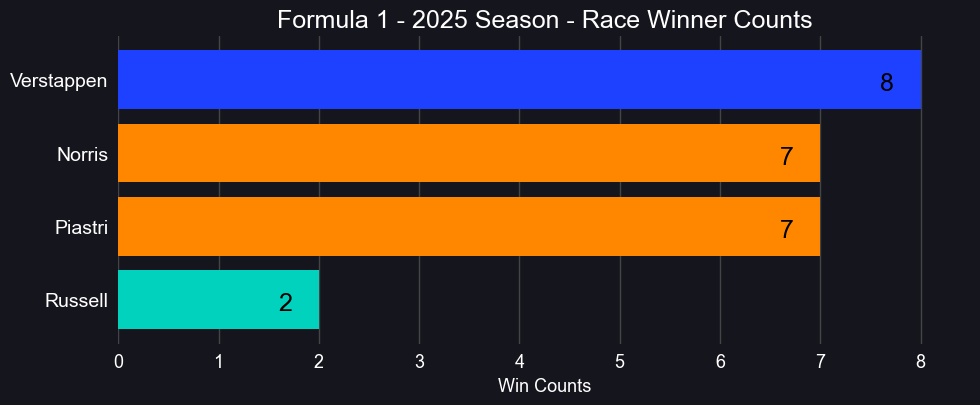

In [592]:
winnerCnt = winners['Driver'].value_counts()
plt.style.use('seaborn-v0_8')
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '#15151e'
plt.rcParams['figure.facecolor'] = '#15151e'
plt.rcParams['grid.color'] = '#444444'
c = assign_color('drivers',winnerCnt.index)
plt.figure(figsize=(11,4))
plt.barh([driver.split()[1] for driver in winnerCnt.index], winnerCnt.values, color=c)
for i in range(len(winnerCnt.values)):
    plt.text(winnerCnt.values[i]-0.4, i+0.15, winnerCnt.values[i], color='k', fontsize=18)
plt.axis([0,max(winnerCnt.values)+0.5,len(winnerCnt)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - Race Winner Counts", fontsize=18)
plt.xlabel("Win Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.grid(axis='y')
plt.show()

In [593]:
polePos = raceResults[raceResults['Starting Grid'] == 1][['Track','Driver','Team','Position','Fastest Lap Time']].set_index('Track')
polePos.rename(columns={'Position':'Finish Position'}, inplace=True)
polePos

,Driver,Team,Finish Position,Fastest Lap Time
Track,,,,
Australia,Lando Norris,McLaren,1,01:22.2
China,Oscar Piastri,McLaren,1,01:35.5
Japan,Max Verstappen,Red Bull Racing Honda RBPT,1,01:31.0
Bahrain,Oscar Piastri,McLaren,1,01:35.1
Saudi Arabia,Max Verstappen,Red Bull Racing Honda RBPT,2,01:32.3
Miami,Max Verstappen,Red Bull Racing Honda RBPT,4,01:30.5
Emilia-Romagna,Oscar Piastri,McLaren,3,01:18.9
Monaco,Lando Norris,McLaren,1,01:13.2
Spain,Oscar Piastri,McLaren,1,01:15.7


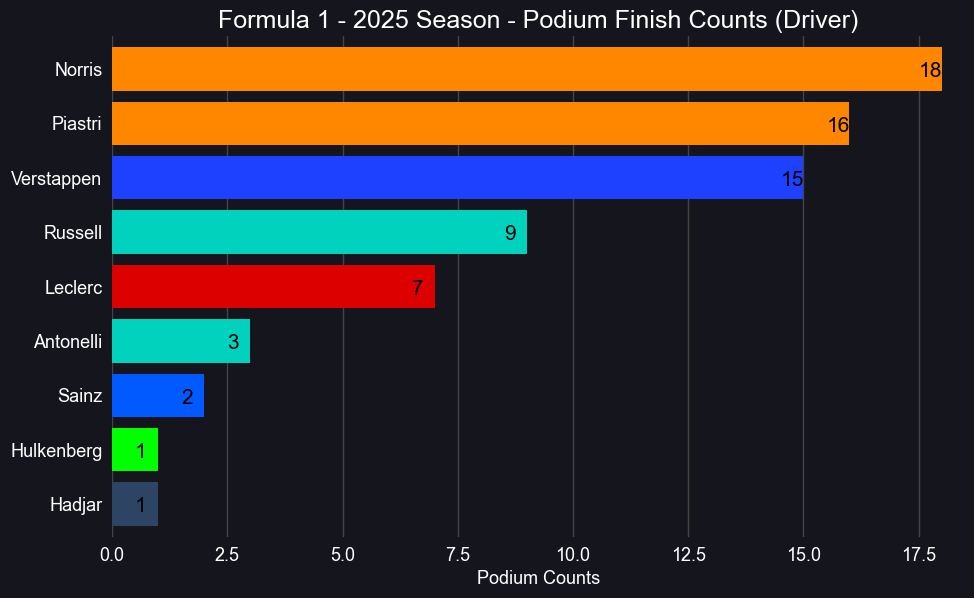

In [594]:
podiums = raceResults[raceResults['Position'].isin(['1','2','3'])]
podiumsCnt = podiums['Driver'].value_counts()
c = assign_color('drivers',podiumsCnt.index)
plt.figure(figsize=(11,6.5))
plt.barh([driver.split()[1] for driver in podiumsCnt.index], podiumsCnt.values, color=c)
for i in range(len(podiumsCnt.values)):
    plt.text(podiumsCnt.values[i]-0.5, i+0.15, podiumsCnt.values[i], color='k', fontsize=15)
plt.axis([0,max(podiumsCnt)+0.5,len(podiumsCnt)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - Podium Finish Counts (Driver)", fontsize=18)
plt.xlabel("Podium Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

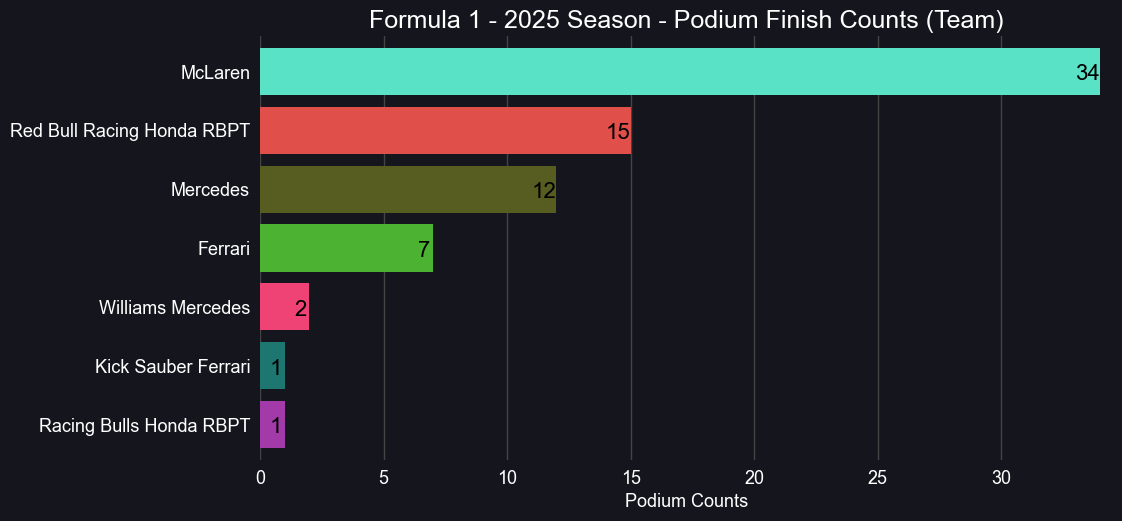

In [595]:
import random
podiumsCntTeam = podiums['Team'].value_counts()
c = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in podiumsCntTeam.index]
plt.figure(figsize=(11,5.5))
plt.barh(podiumsCntTeam.index, podiumsCntTeam.values, color=c)
for i in range(len(podiumsCntTeam.values)):
    if podiumsCntTeam.values[i] >= 10:  sh = 1
    else:   sh = 0.6
    plt.text(podiumsCntTeam.values[i]-sh, i+0.15, podiumsCntTeam.values[i], color='k', fontsize=16)
plt.axis([0,max(podiumsCntTeam.values)+0.5,len(podiumsCntTeam)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - Podium Finish Counts (Team)", fontsize=18)
plt.xlabel("Podium Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

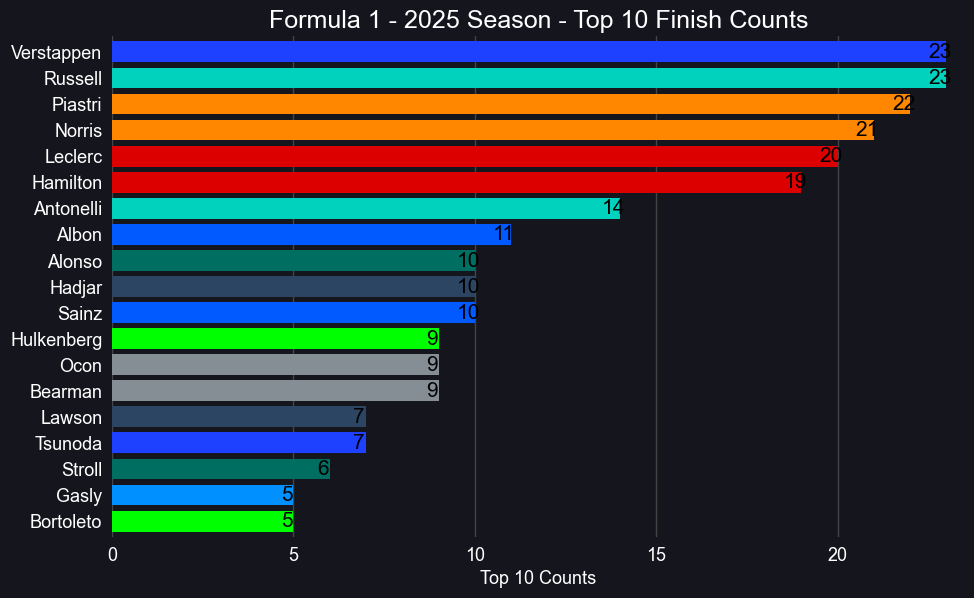

In [596]:
top10 = map(str, list(range(1,11)))
topTenFinishes = raceResults[raceResults['Position'].isin(top10)]['Driver'].value_counts()
c = assign_color('drivers',topTenFinishes.index)
plt.figure(figsize=(11,6.5))
plt.barh([driver.split()[1] for driver in topTenFinishes.index], topTenFinishes.values, color=c)
for i in range(len(topTenFinishes.values)):
    if topTenFinishes.values[i] >= 10:  sh = 0.5
    else:   sh = 0.35
    plt.text(topTenFinishes.values[i]-sh, i+0.23, topTenFinishes.values[i], color='k', fontsize=15)
plt.axis([0,max(topTenFinishes.values)+0.5,len(topTenFinishes)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - Top 10 Finish Counts", fontsize=18)
plt.xlabel("Top 10 Counts", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

In [597]:
fastestLaps = raceResults[raceResults['Set Fastest Lap'] == 'Yes']
fastestLaps.set_index('Track')[['No', 'Driver', 'Team', 'Position']].rename(columns={'Position':'Finish Position'})

,No,Driver,Team,Finish Position
Track,,,,
Australia,4,Lando Norris,McLaren,1
China,44,Lewis Hamilton,Ferrari,DQ
Japan,12,Kimi Antonelli,Mercedes,6
Bahrain,81,Oscar Piastri,McLaren,1
Saudi Arabia,4,Lando Norris,McLaren,4
Miami,4,Lando Norris,McLaren,2
Emilia-Romagna,1,Max Verstappen,Red Bull Racing Honda RBPT,1
Monaco,4,Lando Norris,McLaren,1
Spain,81,Oscar Piastri,McLaren,1


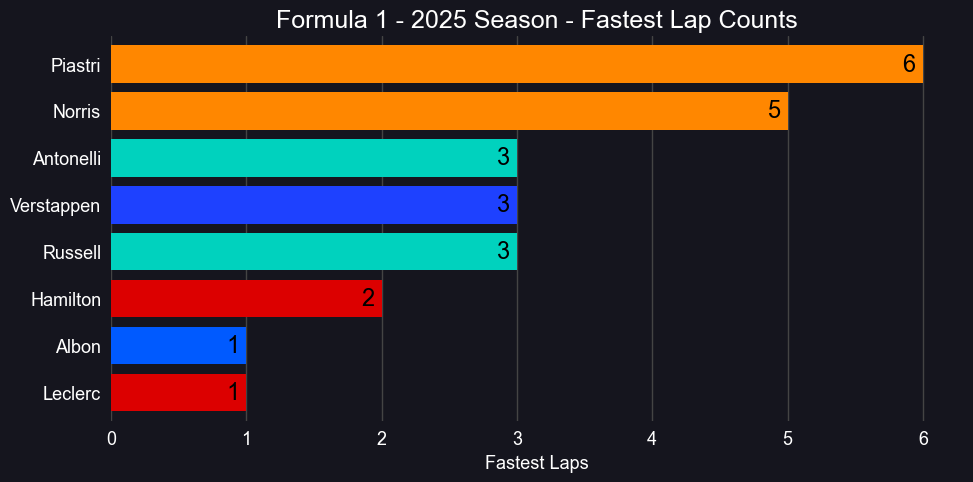

In [598]:
fastestLapCnt = fastestLaps['Driver'].value_counts()
c = assign_color('drivers',fastestLapCnt.index)
plt.figure(figsize=(11,5))
plt.barh([driver.split()[1] for driver in fastestLapCnt.index], fastestLapCnt.values, color=c)
for i in range(len(fastestLapCnt.values)):
    plt.text(fastestLapCnt.values[i]-0.15, i+0.15, fastestLapCnt.values[i], color='k', fontsize=17)
plt.axis([0,max(fastestLapCnt.values)+0.3,len(fastestLapCnt)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - Fastest Lap Counts", fontsize=18)
plt.xlabel("Fastest Laps", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

In [599]:
DNF = raceResults[raceResults['Time/Retired'] == 'DNF']
print("Total of {} DNFs have occurred.".format(DNF.shape[0]))

Total of 51 DNFs have occurred.


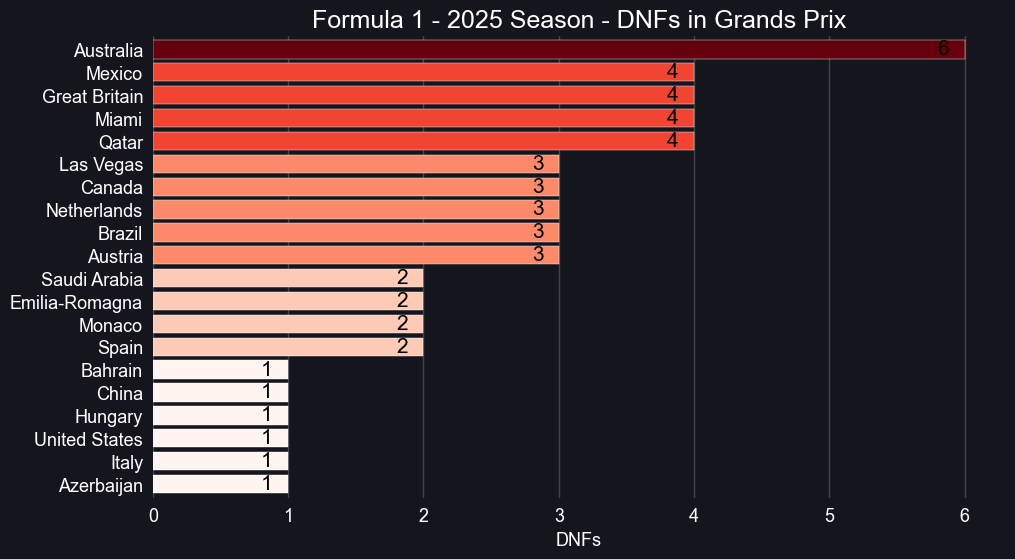

In [613]:
DNFtrack = DNF['Track'].value_counts()
norm = mcolors.Normalize(vmin=DNFtrack.values.min(),vmax=DNFtrack.values.max())
cmap = plt.get_cmap('Reds')
colors = cmap(norm(DNFtrack.values))
plt.figure(figsize=(11,6))
plt.barh(DNFtrack.index,DNFtrack.values,
    color=colors,edgecolor='white',zorder=3)

for i, v in enumerate(DNFtrack.values):
    plt.text(v - 0.2, i + 0.23, v, color='k', fontsize=15)
plt.axis([0, max(DNFtrack.values)+0.3, len(DNFtrack)-0.4, -0.6])
plt.title("Formula 1 - 2025 Season - DNFs in Grands Prix", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()


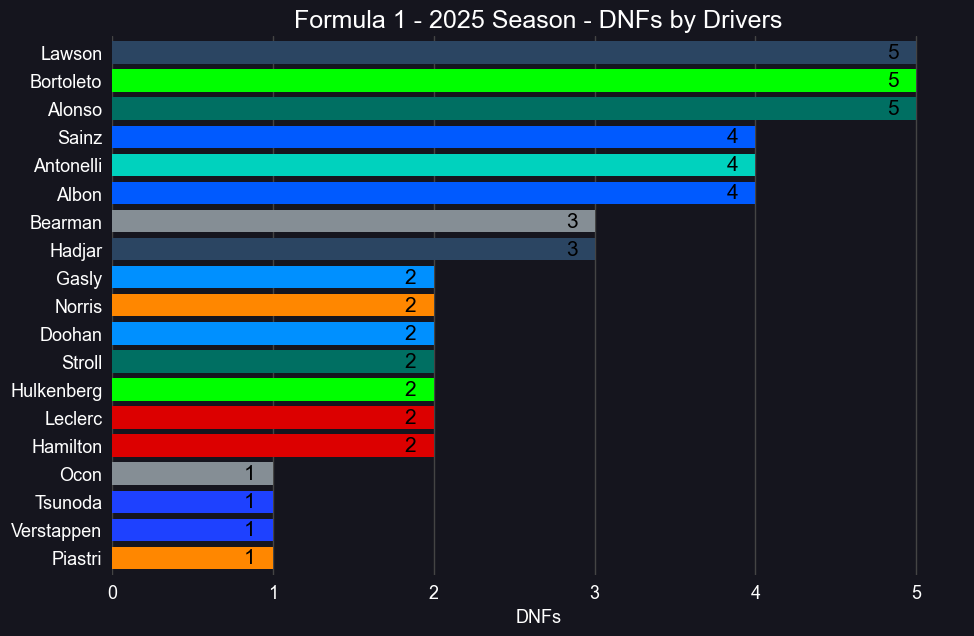

In [601]:
DNFdriver = DNF['Driver'].value_counts()
c = assign_color('drivers',DNFdriver.index)
plt.figure(figsize=(11,7))
plt.barh([driver.split()[1] for driver in DNFdriver.index], DNFdriver.values, color=c)
for i in range(len(DNFdriver.values)):
    plt.text(DNFdriver.values[i]-0.18, i+0.21, DNFdriver.values[i], color='k', fontsize=15)
plt.axis([0,max(DNFdriver.values)+0.3,len(DNFdriver)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - DNFs by Drivers", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

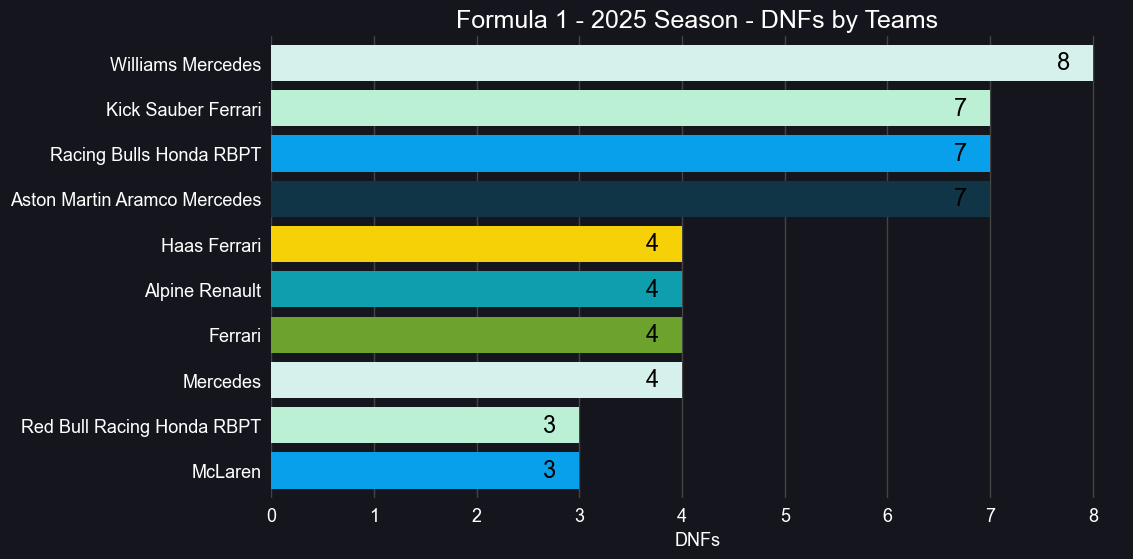

In [602]:
DNFteam = DNF['Team'].value_counts()
c = [f"#{random.randint(0, 0xFFFFFF):06x}" for _ in podiumsCntTeam.index]
plt.figure(figsize=(11,6))
plt.barh(DNFteam.index, DNFteam.values, color=c)
for i in range(len(DNFteam.values)):
    plt.text(DNFteam.values[i]-0.35, i+0.15, DNFteam.values[i], color='k', fontsize=17)
plt.axis([0,max(DNFteam.values)+0.3,len(DNFteam)-0.4,-0.6])
plt.title("Formula 1 - 2025 Season - DNFs by Teams", fontsize=18)
plt.xlabel("DNFs", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()

In [603]:
raceResults[(raceResults['Team'] == 'Mercedes') & (raceResults['Time/Retired'] == 'DNF')] \
    [['Track', 'Driver', 'Team', 'Starting Grid']]

,Track,Driver,Team,Starting Grid
138,Emilia-Romagna,Kimi Antonelli,Mercedes,13
177,Spain,Kimi Antonelli,Mercedes,6
217,Austria,Kimi Antonelli,Mercedes,9
234,Great Britain,Kimi Antonelli,Mercedes,10


In [604]:
raceResults[raceResults['Time/Retired'] == 'DNS'].loc[:,'Track':'Team'].set_index('Track')

,Position,No,Driver,Team
Track,,,,
Austria,NC,55,Carlos Sainz,Williams Mercedes
Great Britain,NC,43,Franco Colapinto,Alpine Renault
Italy,NC,27,Nico Hulkenberg,Kick Sauber Ferrari


In [605]:

raceResults[(raceResults['Position'] != 'NC') & (raceResults['Time/Retired'] == 'DNF')] \
        .loc[:,'Track':'Laps'].set_index('Track')

,Position,No,Driver,Team,Starting Grid,Laps
Track,,,,,,
Canada,18,4,Lando Norris,McLaren,7,66
Netherlands,18,4,Lando Norris,McLaren,2,64
Mexico,17,55,Carlos Sainz,Williams Mercedes,12,67
Qatar,17,18,Lance Stroll,Aston Martin Aramco Mercedes,18,55
Qatar,18,6,Isack Hadjar,Racing Bulls Honda RBPT,6,55


In [606]:
racePtsPerRace = raceResults[['Track','Driver','Race Points']].copy()
sprintPtsPerRace = sprintResults[['Track','Driver','Sprint Points']].copy()

pointsPerRace = pd.merge(racePtsPerRace,sprintPtsPerRace,on=['Track','Driver'],how='left').fillna(0)

pointsPerRace['Total Points'] = (pointsPerRace['Race Points'] + pointsPerRace['Sprint Points'])

GPnames = raceResults['Track'].unique()
TopTenDrivers = finalStandings['Driver'].head(10).values

abbr = [d.split()[1][:3].upper() for d in TopTenDrivers]
color = assign_color('drivers', driverOrder)



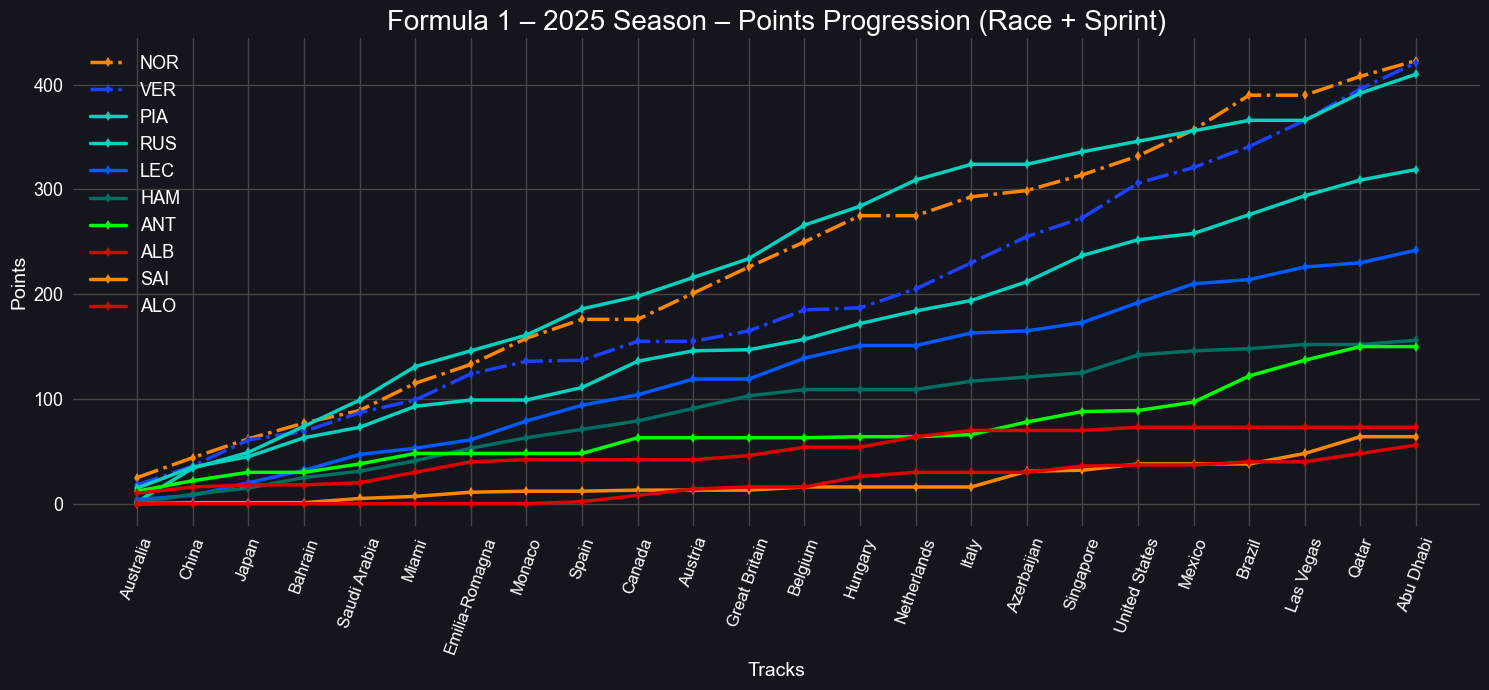

In [607]:
plt.figure(figsize=(15,7))
for i, driver in enumerate(TopTenDrivers):
    driverPts = (pointsPerRace[pointsPerRace['Driver'] == driver].set_index('Track').reindex(GPnames)['Total Points'].fillna(0).cumsum().values)
    if abbr[i] in ['VER','NOR']:
        plt.plot(driverPts,color=color[i],label=abbr[i],linestyle='-.',marker='d',markersize=5,linewidth=2.5)
    else:plt.plot(driverPts,color=color[i],label=abbr[i],marker='d',markersize=5,linewidth=2.5)

plt.title("Formula 1 – 2025 Season – Points Progression (Race + Sprint)",fontsize=20)
plt.xlabel("Tracks", fontsize=14)
plt.ylabel("Points", fontsize=14)
plt.xticks(range(len(GPnames)), GPnames, rotation=70, fontsize=12)
plt.yticks(fontsize=13)
plt.legend(fontsize=13)
plt.tight_layout()
plt.show()



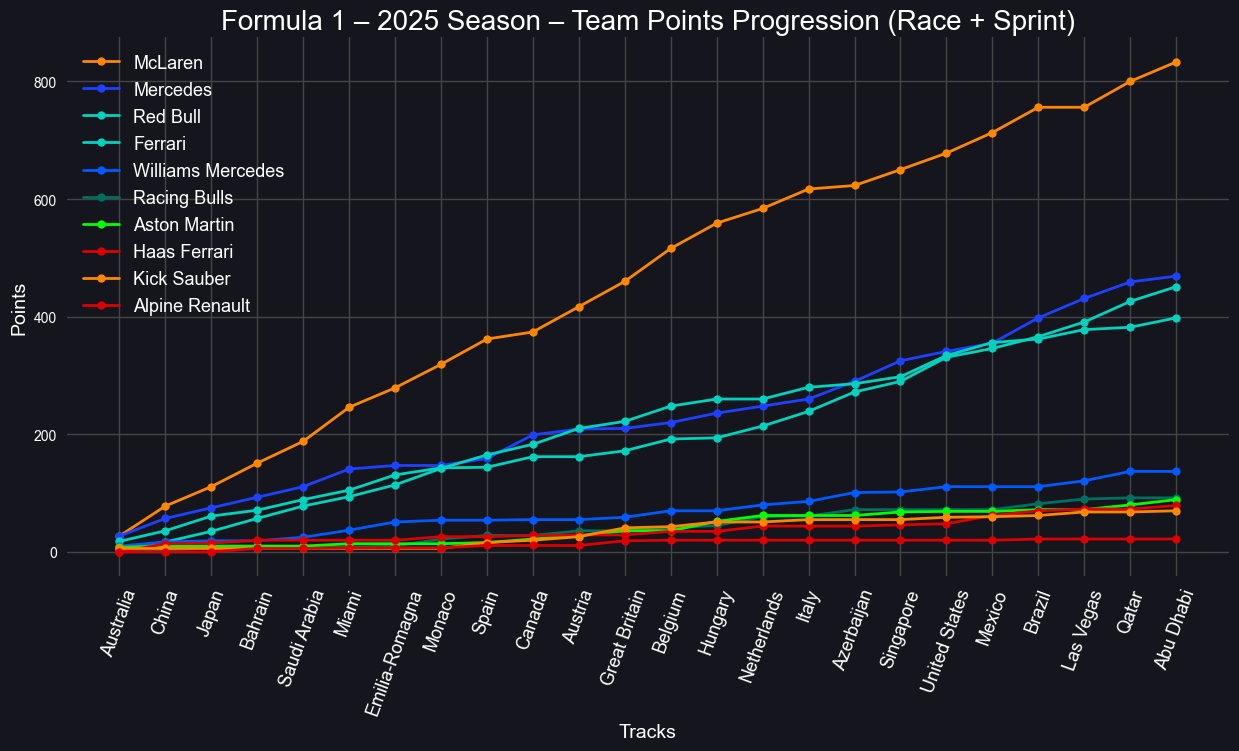

In [608]:
raceTeamPts = (raceResults.groupby(['Track','Team'])['Race Points'].sum().reset_index())
sprintTeamPts = (sprintResults.groupby(['Track','Team'])['Sprint Points'].sum().reset_index())
trackTeamPts = pd.merge(raceTeamPts,sprintTeamPts,on=['Track','Team'],how='left').fillna(0)

trackTeamPts['Total Points'] = (trackTeamPts['Race Points'] + trackTeamPts['Sprint Points'])
trackOrder = raceResults['Track'].unique()
teamOrder = constructorsSt['Team'].unique()

abbr = [" ".join(team.split()[:2]) for team in teamOrder]
color = assign_color('drivers', driverOrder)


plt.figure(figsize=(15,7))
for i, team in enumerate(teamOrder):
    teamPts = (trackTeamPts[trackTeamPts['Team'] == team].set_index('Track').reindex(trackOrder)['Total Points']
               .fillna(0).cumsum().values)

    plt.plot(teamPts,color=color[i],label=abbr[i],marker='o',markersize=6,linewidth=2)

plt.title("Formula 1 – 2025 Season – Team Points Progression (Race + Sprint)", fontsize=20)
plt.xlabel('Tracks', fontsize=14)
plt.ylabel('Points', fontsize=14)
plt.xticks(range(len(trackOrder)), trackOrder, rotation=70, fontsize=13)
plt.legend(fontsize=13)
plt.show()


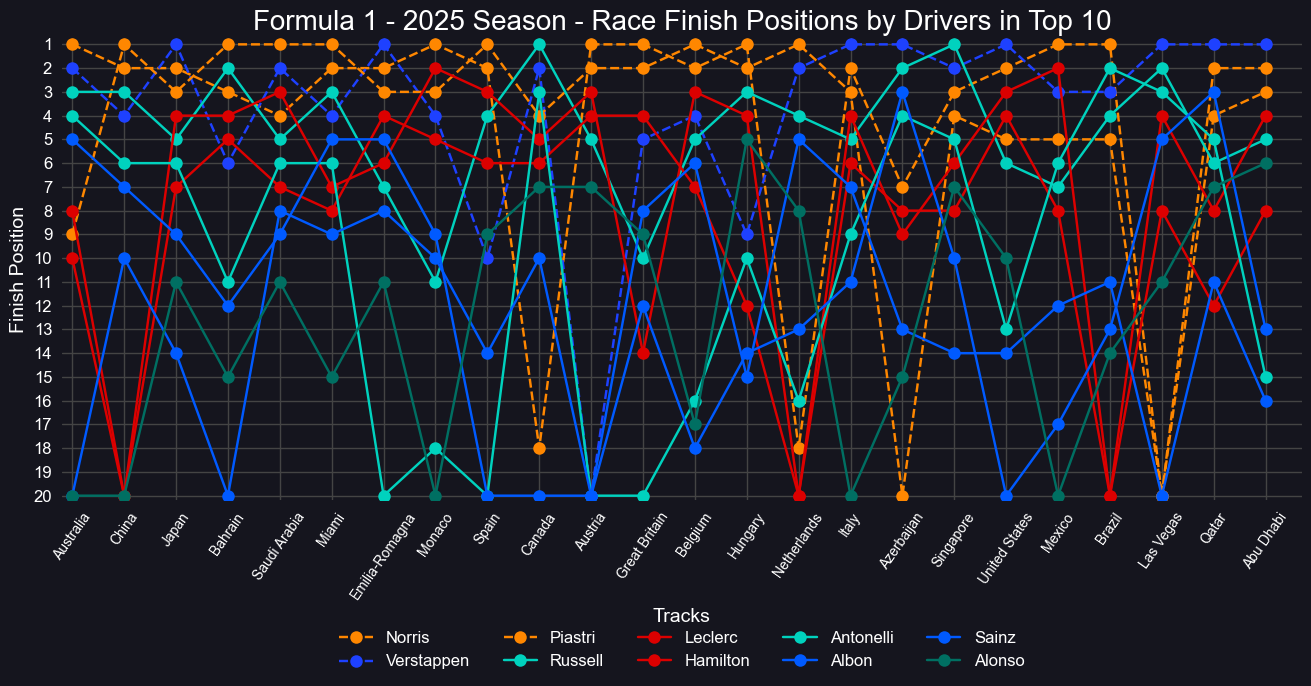

In [609]:
finishPos = raceResults[['Track','Driver','Position']].copy()
finishPos['Position'] = finishPos['Position'].replace({
    'NC': 20,
    'DQ': 20,
    'DSQ': 20,
    'DNF': 20
})
finishPos['Position'] = pd.to_numeric(
    finishPos['Position'],
    errors='coerce'
)
driverOrder = finalStandings['Driver'].unique()[:10]
color = assign_color('drivers', driverOrder)
plt.figure(figsize=(16,7))
plt.xlim(-0.2, len(trackOrder) - 0.3)
plt.ylim(20.2, 0.75)
for i in range(len(driverOrder)):
    driverPos = (
    finishPos[finishPos['Driver'] == driverOrder[i]]
        .set_index('Track')
        .reindex(trackOrder)['Position']
        .values)
    
    abbr = driverOrder[i].split()[1].upper()[:3]

    if abbr in ['PIA','VER','NOR']: ls = '--'
    else:   ls = '-'
    plt.plot(trackOrder, driverPos, color=color[i], marker='o', markersize=9, linestyle=ls, label=driverOrder[i].split()[1])
plt.title("Formula 1 - 2025 Season - Race Finish Positions by Drivers in Top 10", fontsize=20)
plt.xlabel('Tracks', fontsize=14)
plt.xticks(rotation=55, fontsize=10)
plt.ylabel('Finish Position', fontsize=14)
plt.yticks(range(1,21),range(1,21), fontsize=12)
plt.legend(
    loc='upper center',
    bbox_to_anchor=(0.5, -0.25),  
    ncol=5,                       
    fontsize=12,
    frameon=False
)

plt.subplots_adjust(bottom=0.22)

plt.show()

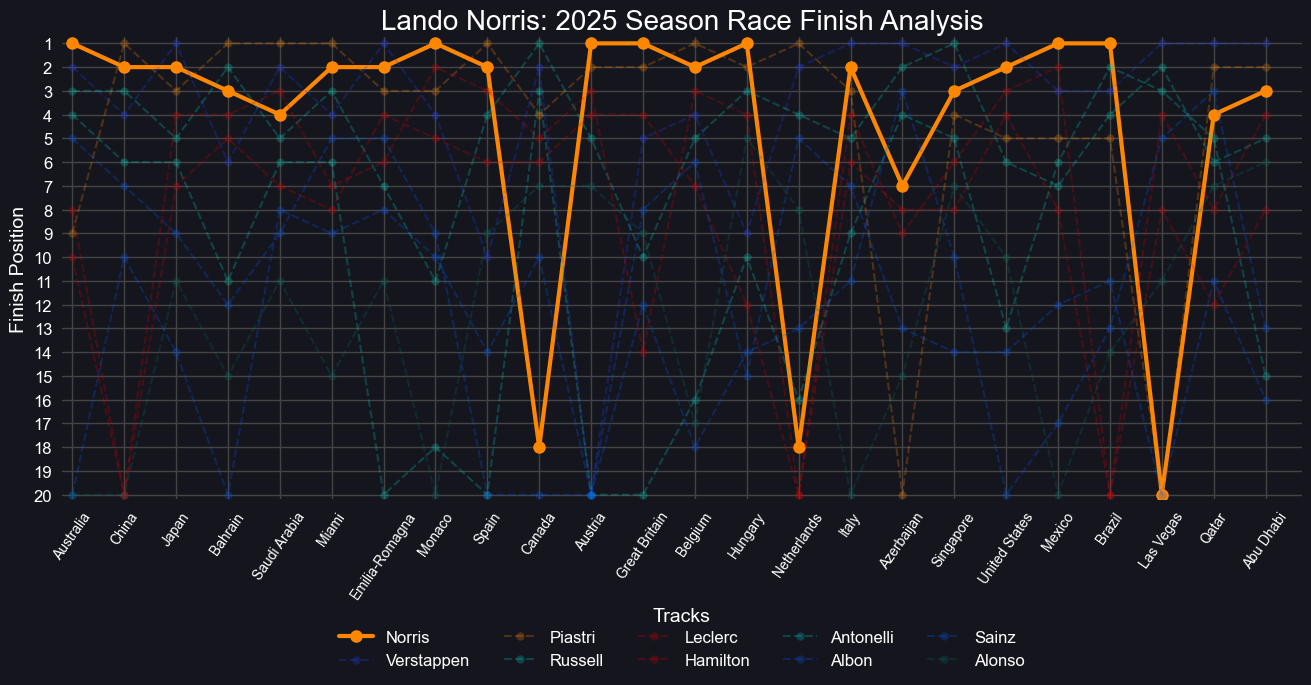

In [610]:
finishPos = raceResults[['Track','Driver','Position']].copy()
finishPos['Position'] = finishPos['Position'].replace({
    'NC': 20,
    'DQ': 20,
    'DSQ': 20,
    'DNF': 20
})
finishPos['Position'] = pd.to_numeric(
    finishPos['Position'],errors='coerce')
driverOrder = finalStandings['Driver'].unique()[:10]
color = assign_color('drivers', driverOrder)

plt.figure(figsize=(16,7))
plt.xlim(-0.2, len(trackOrder) - 0.3)
plt.ylim(20.2, 0.75)
highlight_driver = "Lando Norris"
for i in range(len(driverOrder)):
    driver = driverOrder[i]
    driverPos = (finishPos[finishPos['Driver'] == driver].set_index('Track').reindex(trackOrder)['Position'].values)
    is_highlight = (driver == highlight_driver)
    plt.plot(trackOrder,driverPos,color=color[i],marker='o',
        markersize=9 if is_highlight else 6,
        linewidth=3 if is_highlight else 1.5,
        alpha=1.0 if is_highlight else 0.25,  
        linestyle='-' if is_highlight else '--',
        label=driver.split()[1]
    )

plt.title("Lando Norris: 2025 Season Race Finish Analysis", fontsize=20)
plt.xlabel('Tracks', fontsize=14)
plt.xticks(rotation=55, fontsize=10)
plt.ylabel('Finish Position', fontsize=14)
plt.yticks(range(1,21),range(1,21), fontsize=12)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, -0.25),ncol=5,fontsize=12,frameon=False)
plt.subplots_adjust(bottom=0.22)
plt.show()

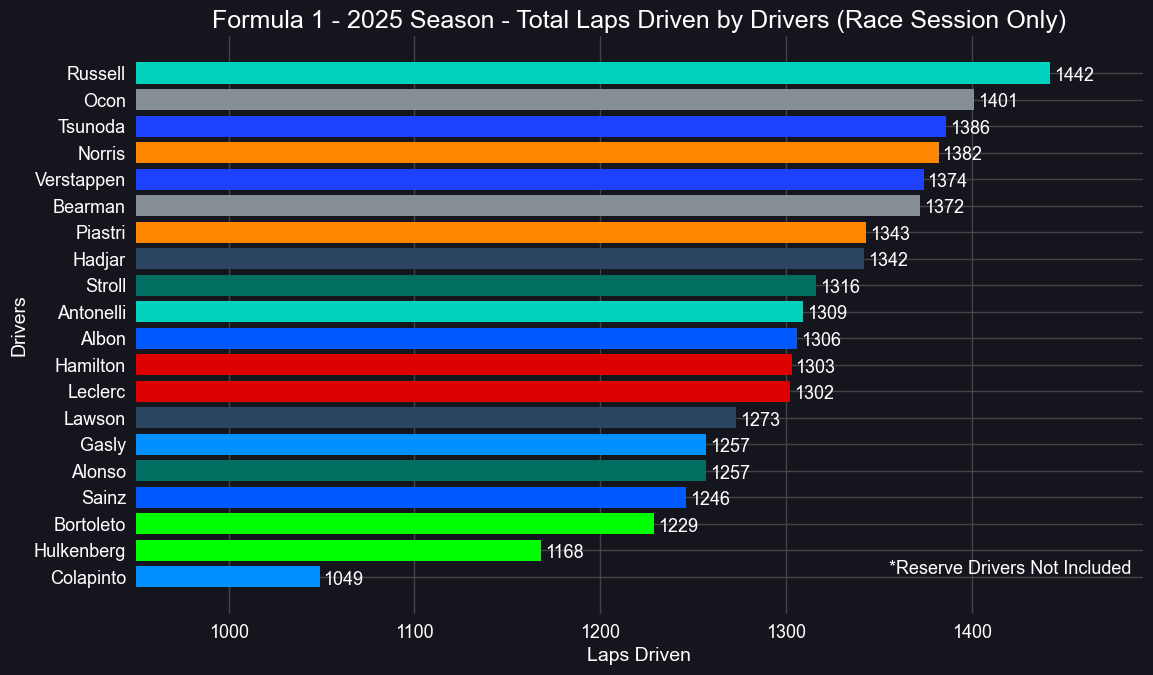

In [611]:
driverLaps = raceResults.groupby(['Driver'])['Laps'].sum().sort_values().tail(20)
c = assign_color('drivers', driverLaps.index)
abbr = [driver.split()[1] for driver in driverLaps.index]

plt.figure(figsize=(13,7.5))
plt.barh(driverLaps.index, driverLaps, color=c)
for i, val in enumerate(driverLaps.values):
    plt.text(val +2, i-0.10, val, va='center', fontsize=13, color='White')
plt.xlim(950, driverLaps.max() + 50)
plt.text(driverLaps.max() * 0.94,0.1,"*Reserve Drivers Not Included",fontsize=13)
plt.title("Formula 1 - 2025 Season - Total Laps Driven by Drivers (Race Session Only)", fontsize=18)
plt.xlabel('Laps Driven', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Drivers', fontsize=14)
plt.yticks(range(20), abbr, fontsize=13)
plt.show()


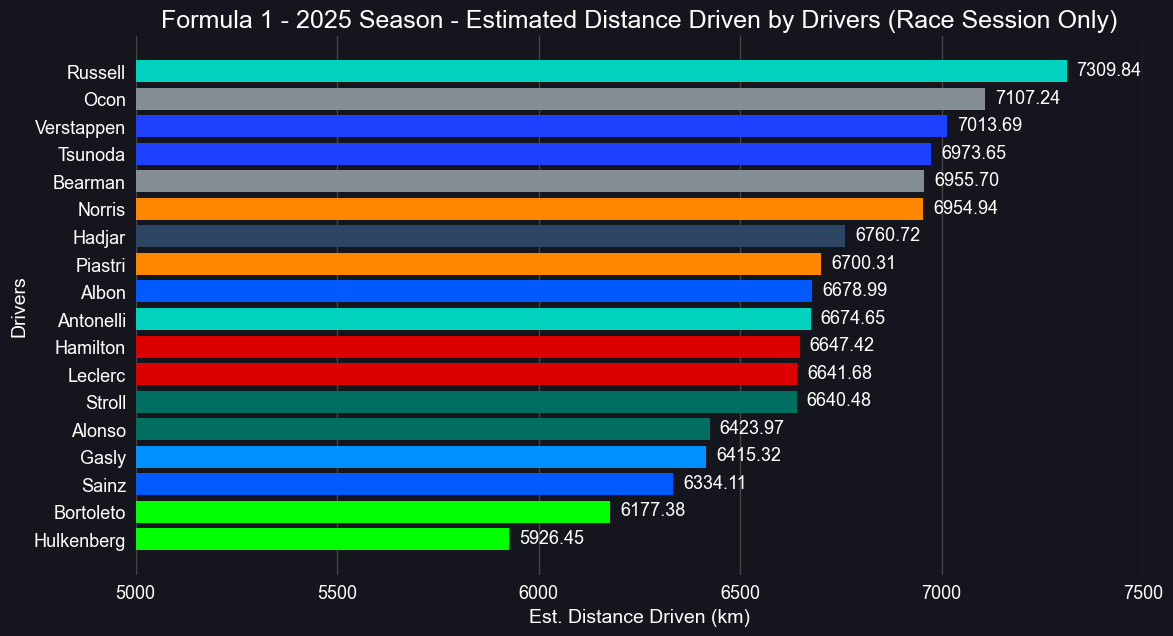

In [612]:
circuitLenOrder = calendar['Circuit Length(km)'].values
driverLaps = raceResults.groupby(['Driver','Track'])['Laps'].sum().reset_index()
driverOrder = raceResults['Driver'].unique()
driverOrder = driverOrder[~np.isin(driverOrder,['Franco Colapinto', 'Jack Doohan', 'Liam Lawson'])]

driverTotDist = np.array([])
for i in range(len(driverOrder)):
    dlaps = np.array([])
    for j in range(len(trackOrder)):
        dl = driverLaps.loc[(driverLaps['Driver'] == driverOrder[i]) & 
                            (driverLaps['Track'] == trackOrder[j])]['Laps'].tolist()
        if len(dl) == 0:  dlaps = np.append(dlaps, 0)
        else:  dlaps = np.append(dlaps, dl[0])
    driverTotDist = np.append(driverTotDist, sum(dlaps * circuitLenOrder))
driverTotDist = pd.Series(driverTotDist, index=driverOrder).sort_values()
c = assign_color('drivers',driverTotDist.index)
plt.figure(figsize=(13,7))
plt.barh([driver.split()[1] for driver in driverTotDist.index], driverTotDist, color=c)
plt.xlim(5000, 7500)
for i in range(len(driverTotDist)):
    plt.text(driverTotDist.iloc[i]+25, i-0.15,
         f"{driverTotDist.iloc[i]:.2f}", color='White', fontsize=13)
plt.title("Formula 1 - 2025 Season - Estimated Distance Driven by Drivers (Race Session Only)", fontsize=18)
plt.xlabel('Est. Distance Driven (km)', fontsize=14)
plt.xticks(fontsize=13)
plt.ylabel('Drivers', fontsize=14)
plt.yticks(fontsize=13)
plt.grid(axis='y')
plt.show()